# Feature Engineering

In [1]:
# Test which scaling & transforming to use

In [2]:
# ----------------------------------
# IMPORTS
#-----------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
plt.style.use('ggplot')

import sys
sys.path.insert(0, "../02_src")

import data_exploration #visualizations

from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer, QuantileTransformer

In [71]:
df = pd.read_csv("../00_data/1_interim/knnimputed.csv")
df_full = pd.read_csv("../00_data/1_interim/filtered_data_01.csv")
df_features = df.drop(columns=["child_mortality_igme"])

regions = pd.read_csv("../00_data/1_interim/world-regions-worldbank.csv")

In [77]:
world_regions = regions[["Entity", "World regions according to WB"]]

In [4]:
df_full_imp = df.copy()
df_full_imp[["Code", "Entity", "Year"]] = df_full[["Code", "Entity", "Year"]]

### original distributions

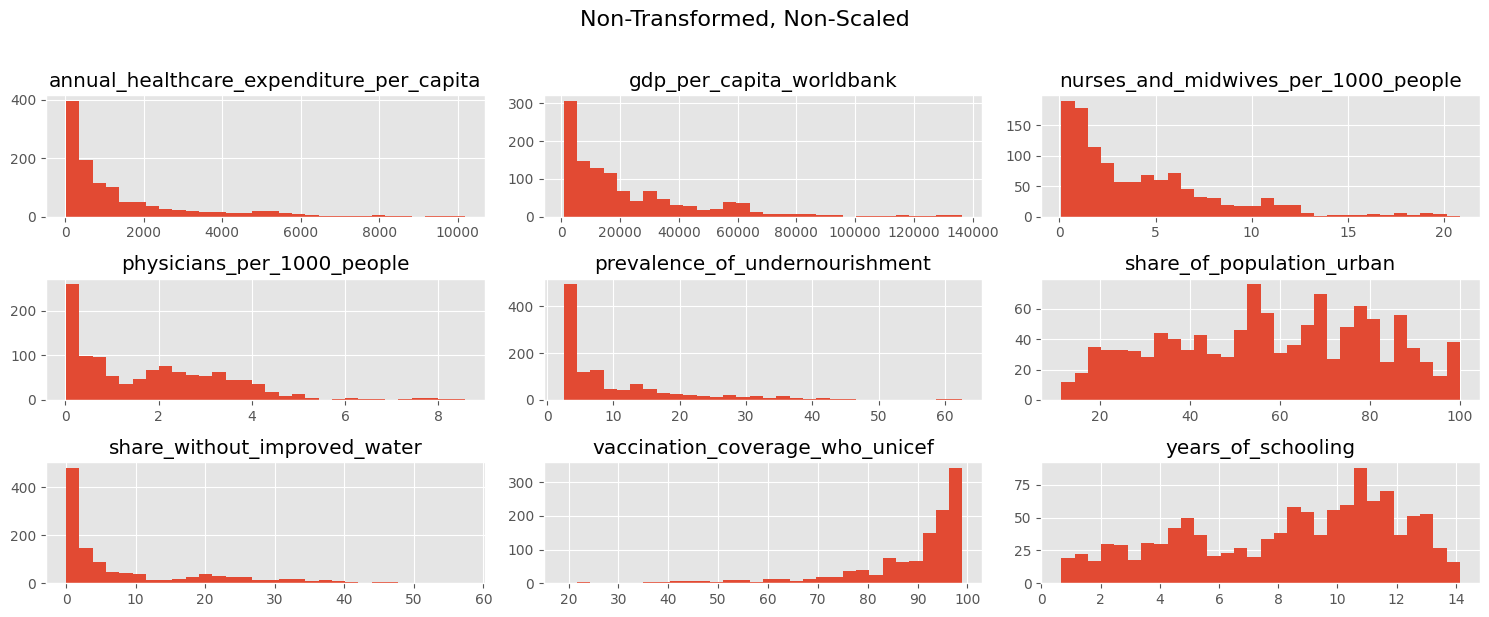

In [5]:
# ----------------------------------
# ORIGINAL DISTRIBUTIONS
#-----------------------------------
df_features.hist(bins=30, figsize=(15, 6))
plt.suptitle("Non-Transformed, Non-Scaled", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### only log1p 

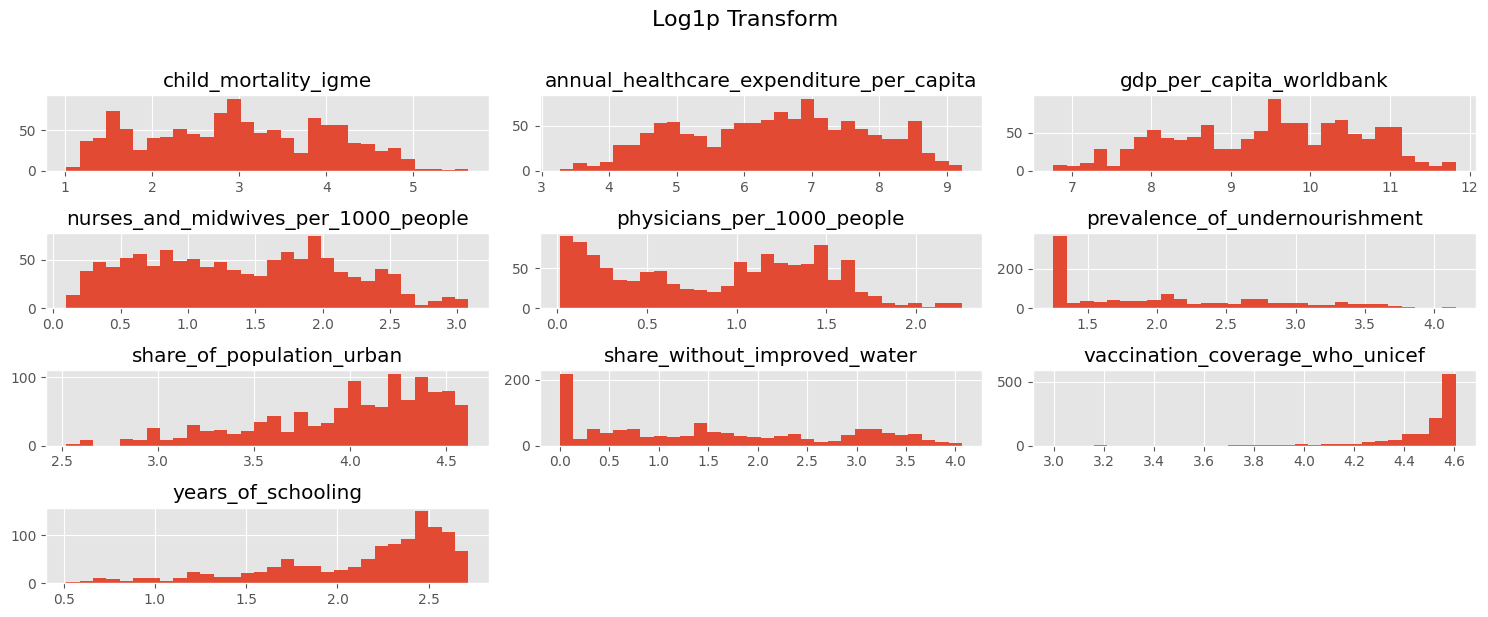

In [6]:
# ----------------------------------
# only log1p 
#-----------------------------------
df_test0 = df.copy()

log_df = np.log1p(df_test0)

df_transformed0 = pd.DataFrame(
    log_df,
    columns=df_test0.columns
)

df_transformed0.hist(bins=30, figsize=(15, 6))
plt.suptitle("Log1p Transform", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

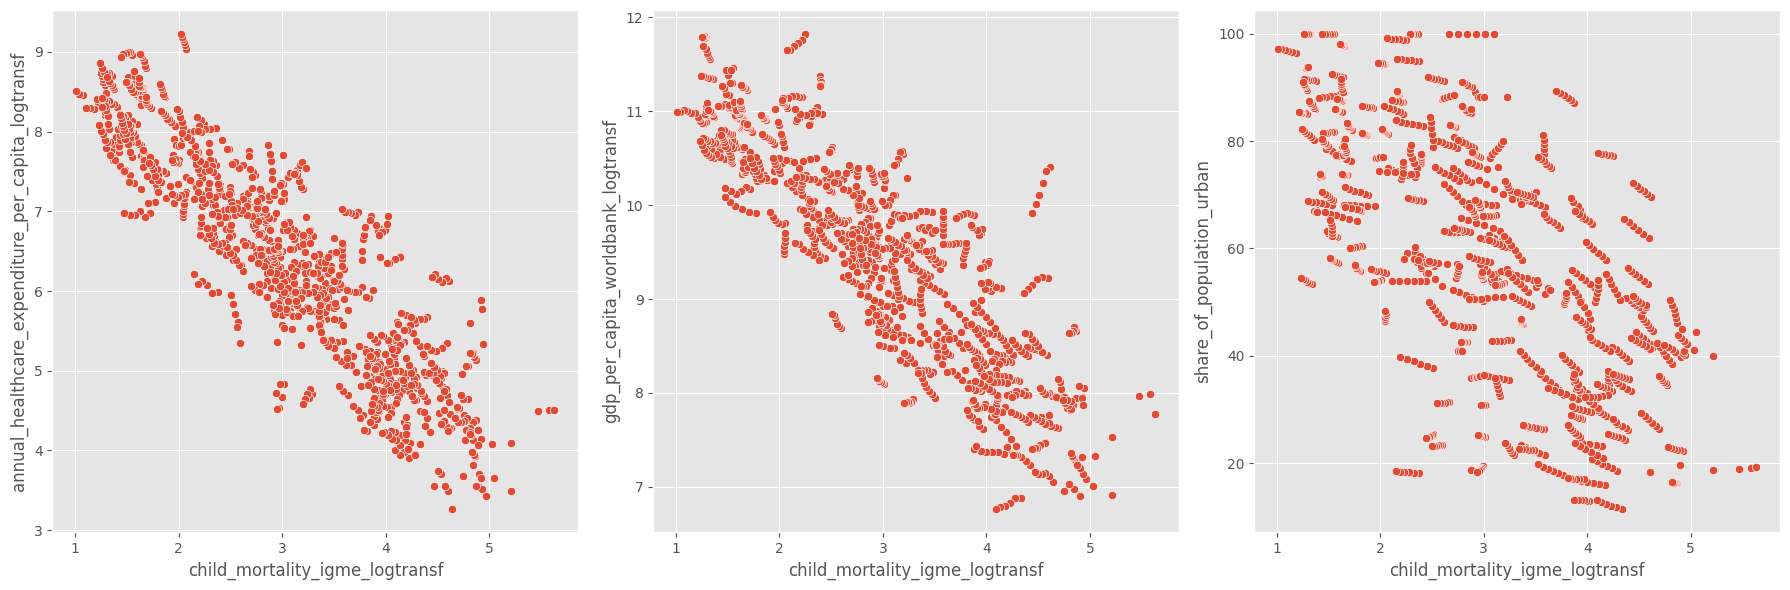

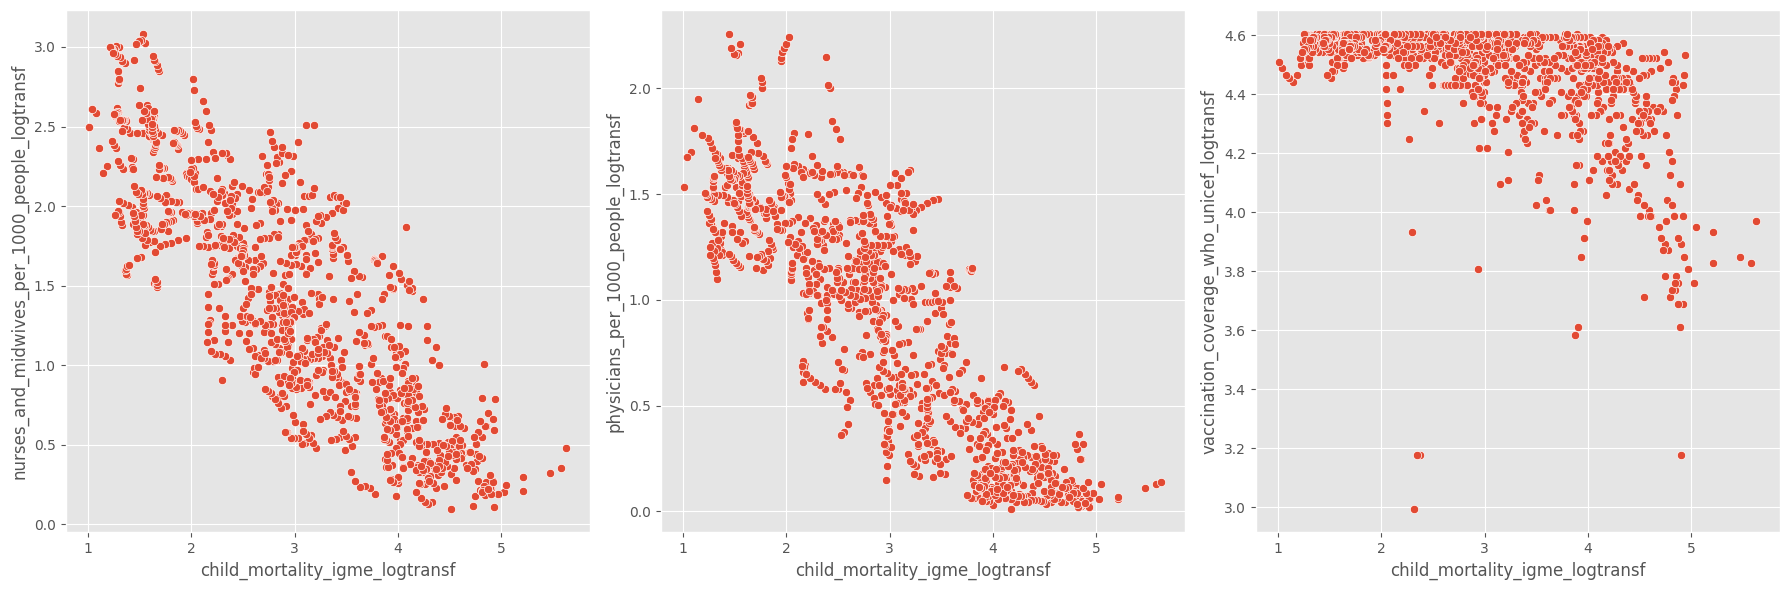

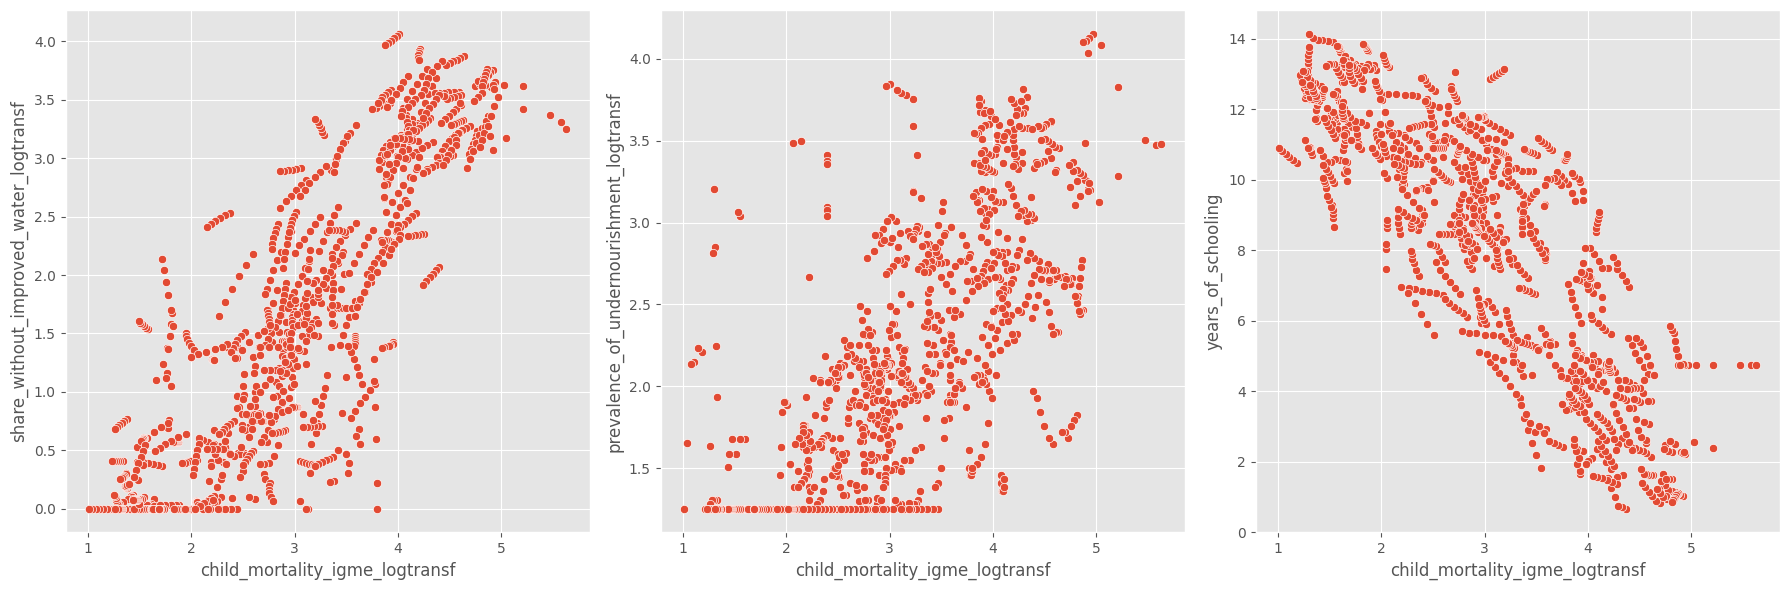

In [7]:
logtr = df_transformed0.add_suffix('_logtransf')
rel_logtr = pd.concat([df_features, logtr], axis=1)

def scatterplots_tr(df, features, cols_num):
    fig, axs = plt.subplots(ncols=cols_num, figsize=(18, 6))
    for id, a in enumerate(axs):
        sns.scatterplot(data=df, x="child_mortality_igme_logtransf", y=features[id], ax=axs[id])
    plt.tight_layout()
    plt.show()

scatterplots_tr(rel_logtr, ["annual_healthcare_expenditure_per_capita_logtransf", "gdp_per_capita_worldbank_logtransf", "share_of_population_urban"], 3)
scatterplots_tr(rel_logtr, ["nurses_and_midwives_per_1000_people_logtransf", "physicians_per_1000_people_logtransf", "vaccination_coverage_who_unicef_logtransf"], 3)
scatterplots_tr(rel_logtr, ["share_without_improved_water_logtransf", "prevalence_of_undernourishment_logtransf", "years_of_schooling"], 3)

### log1p + StandardScaler

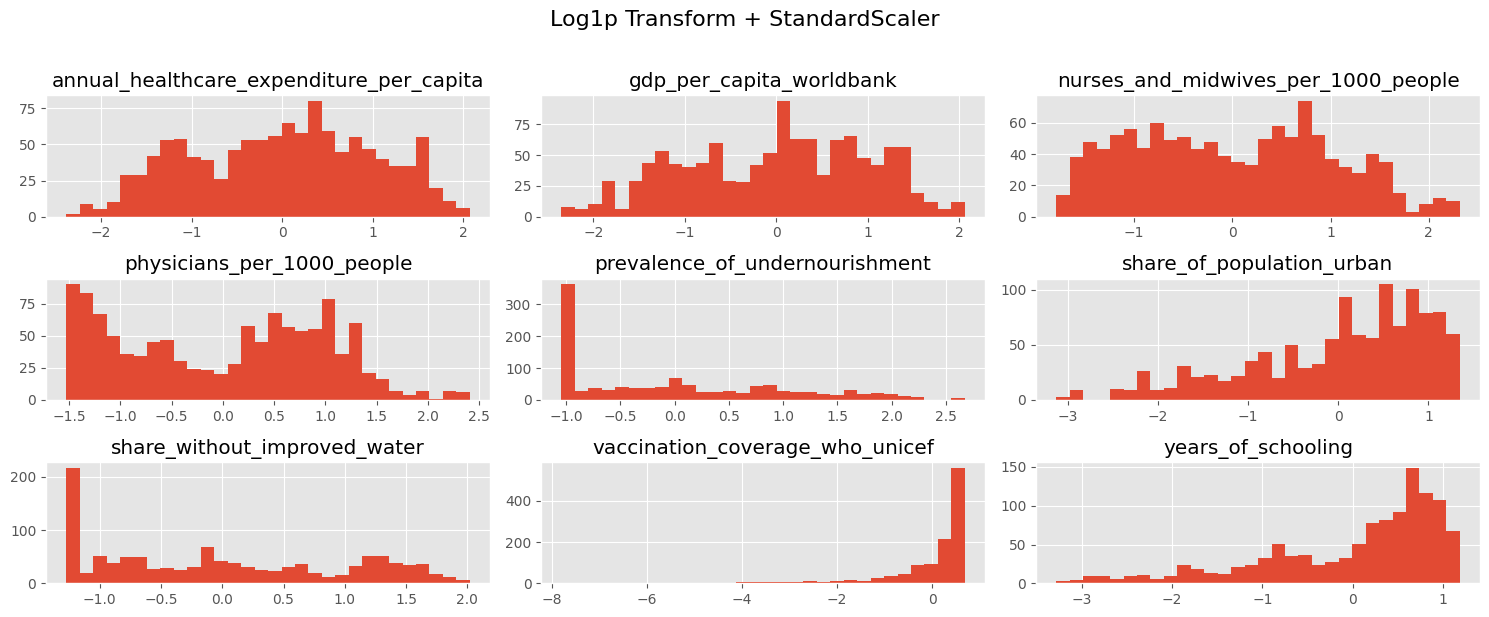

In [8]:
# ----------------------------------
# log1p + StandardScaler
#-----------------------------------
df_test1 = df_features.copy()

log_transform_df_test1 = np.log1p(df_test1)

scaler1 = StandardScaler()
scale_data1 = scaler1.fit_transform(log_transform_df_test1)

df_transformed1 = pd.DataFrame(
    scale_data1,
    columns=df_test1.columns
)

df_transformed1.hist(bins=30, figsize=(15, 6))
plt.suptitle("Log1p Transform + StandardScaler", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### log1p + RobustScaler

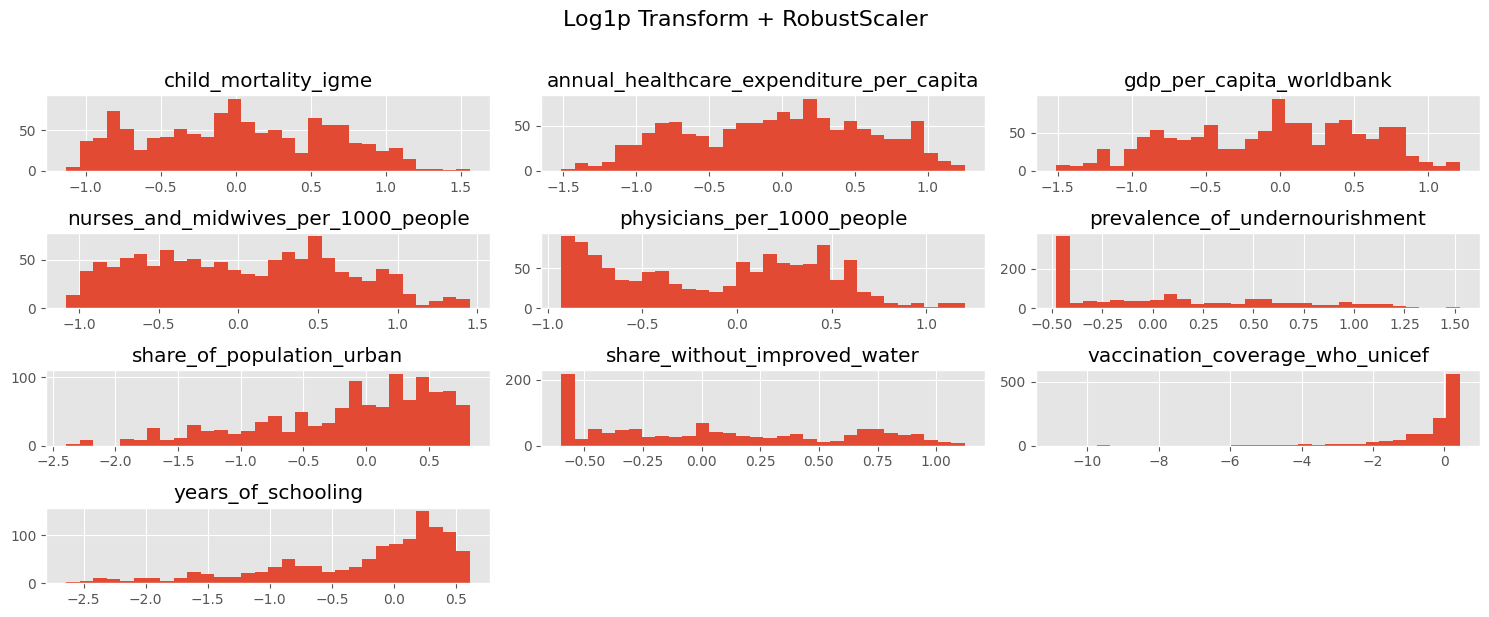

In [9]:
# ----------------------------------
# log1p + RobustScaler
#-----------------------------------
df_test2 = df.copy()

log_transform_df_test2 = np.log1p(df_test2)

scaler2 = RobustScaler()
scale_data2 = scaler2.fit_transform(log_transform_df_test2)

df_transformed2 = pd.DataFrame(
    scale_data2,
    columns=df_test2.columns
)

df_transformed2.hist(bins=30, figsize=(15, 6))
plt.suptitle("Log1p Transform + RobustScaler", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### PowerTransformer + StandardScaler

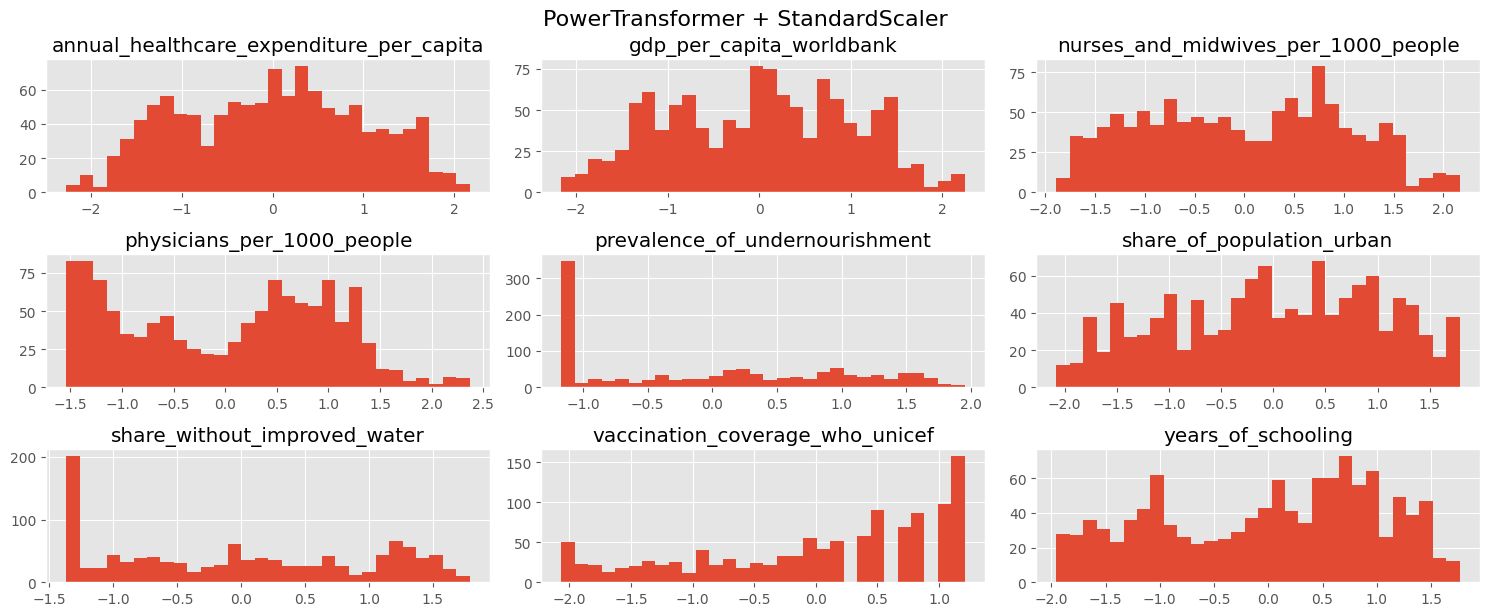

In [10]:
# ----------------------------------
# PowerTransformer + StandardScaler
#-----------------------------------
df_test3 = df_features.copy()

power_transform_df_test3 = PowerTransformer() #uses StandardScaler intern default
df_test3_transformed = power_transform_df_test3.fit_transform(df_test3)

#scaler3 = StandardScaler()
#scale_data3 = scaler3.fit_transform(df_test3_transformed)

df_transformed3 = pd.DataFrame(
    df_test3_transformed,
    columns=df_test3.columns
)

df_transformed3.hist(bins=30, figsize=(15, 6))
plt.tight_layout()
plt.suptitle("PowerTransformer + StandardScaler", fontsize=16, y=1.02)
plt.show()

### PowerTransformer + RobustSclaer

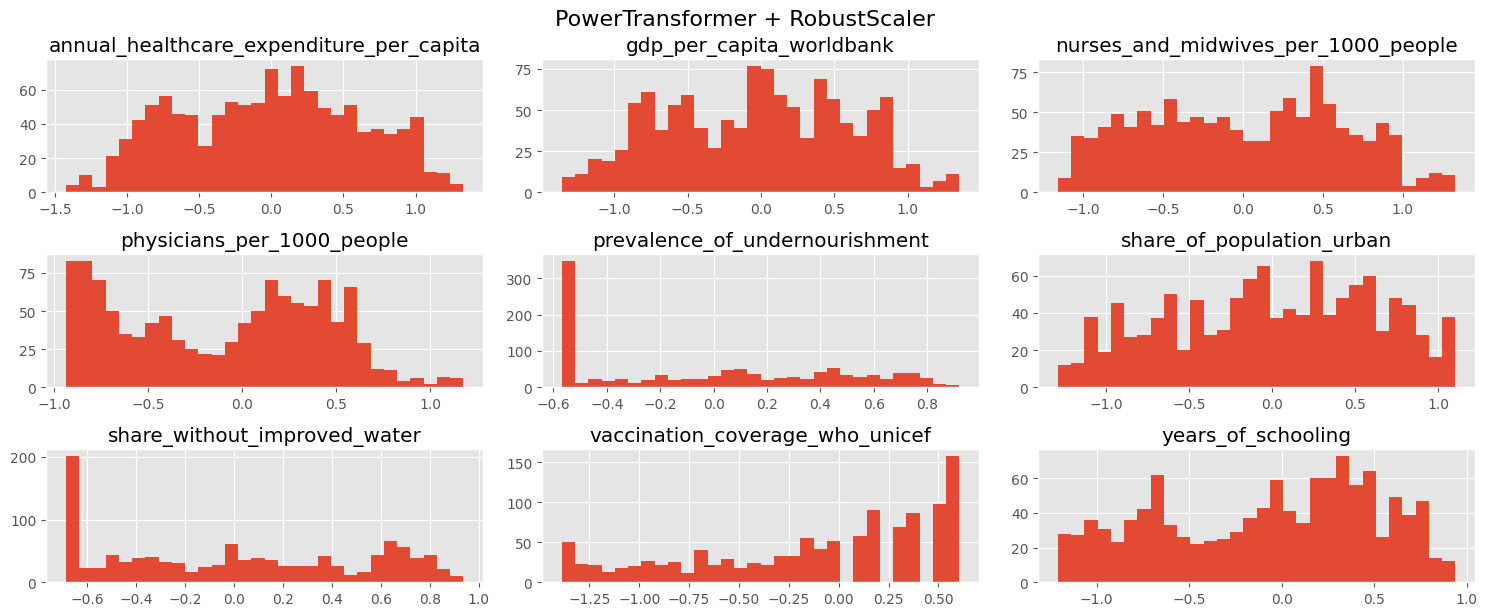

In [11]:
# ----------------------------------
# PowerTransformer + RobustSclaer
#-----------------------------------
df_test4 = df_features.copy()

power_transform_df_test4 = PowerTransformer() 
df_test4_transformed = power_transform_df_test4.fit_transform(df_test4)

scaler4 = RobustScaler()
scale_data4 = scaler4.fit_transform(df_test4_transformed)

df_transformed4 = pd.DataFrame(
    scale_data4,
    columns=df_test4.columns
)

df_transformed4.hist(bins=30, figsize=(15, 6))
plt.tight_layout()
plt.suptitle("PowerTransformer + RobustScaler", fontsize=16, y=1.02)
plt.show()

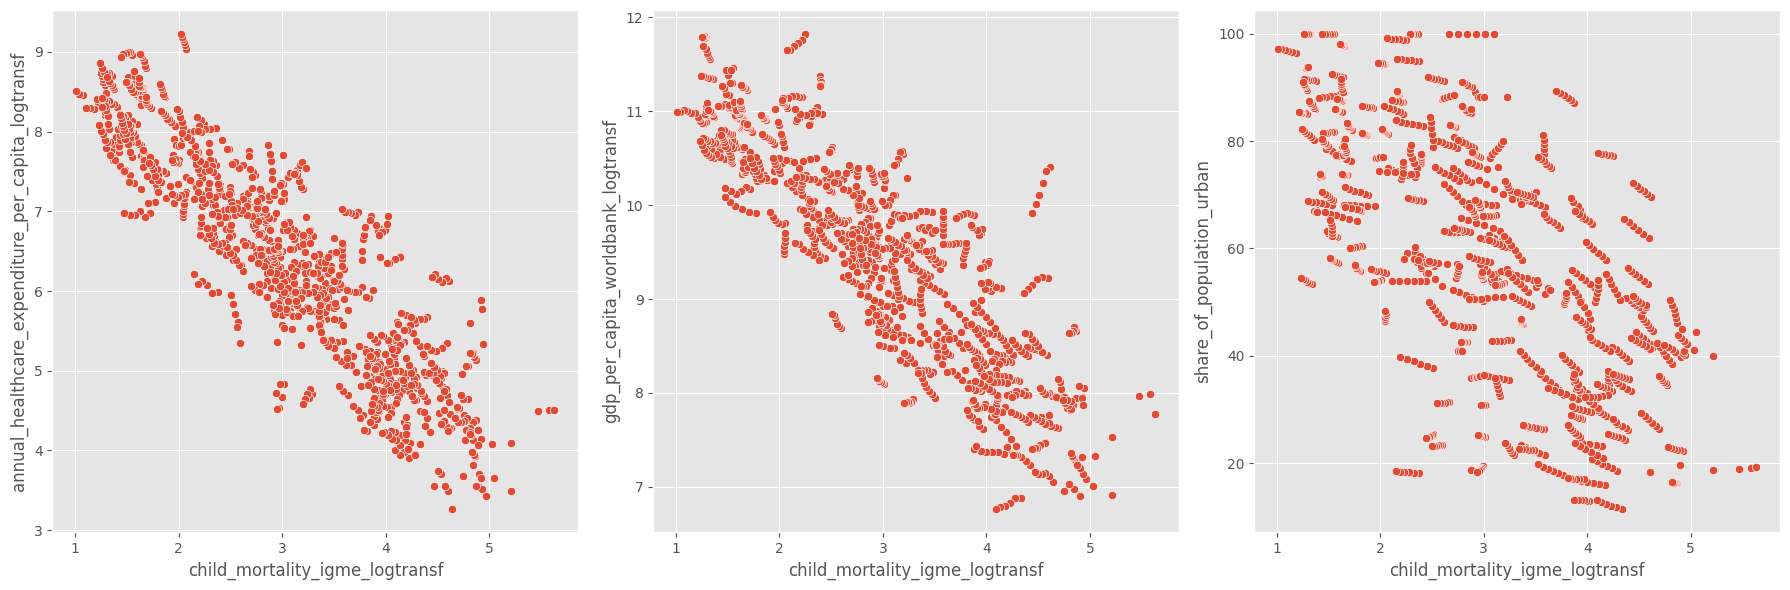

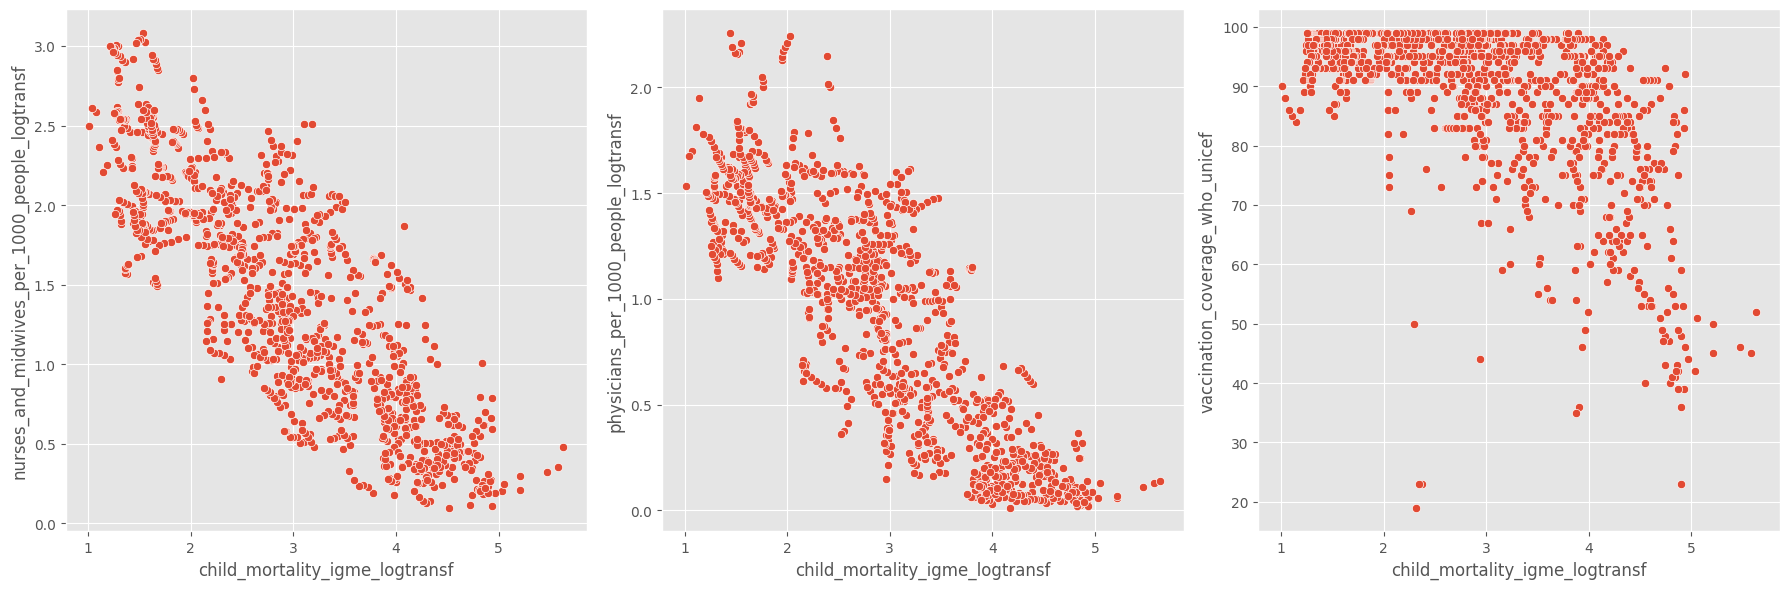

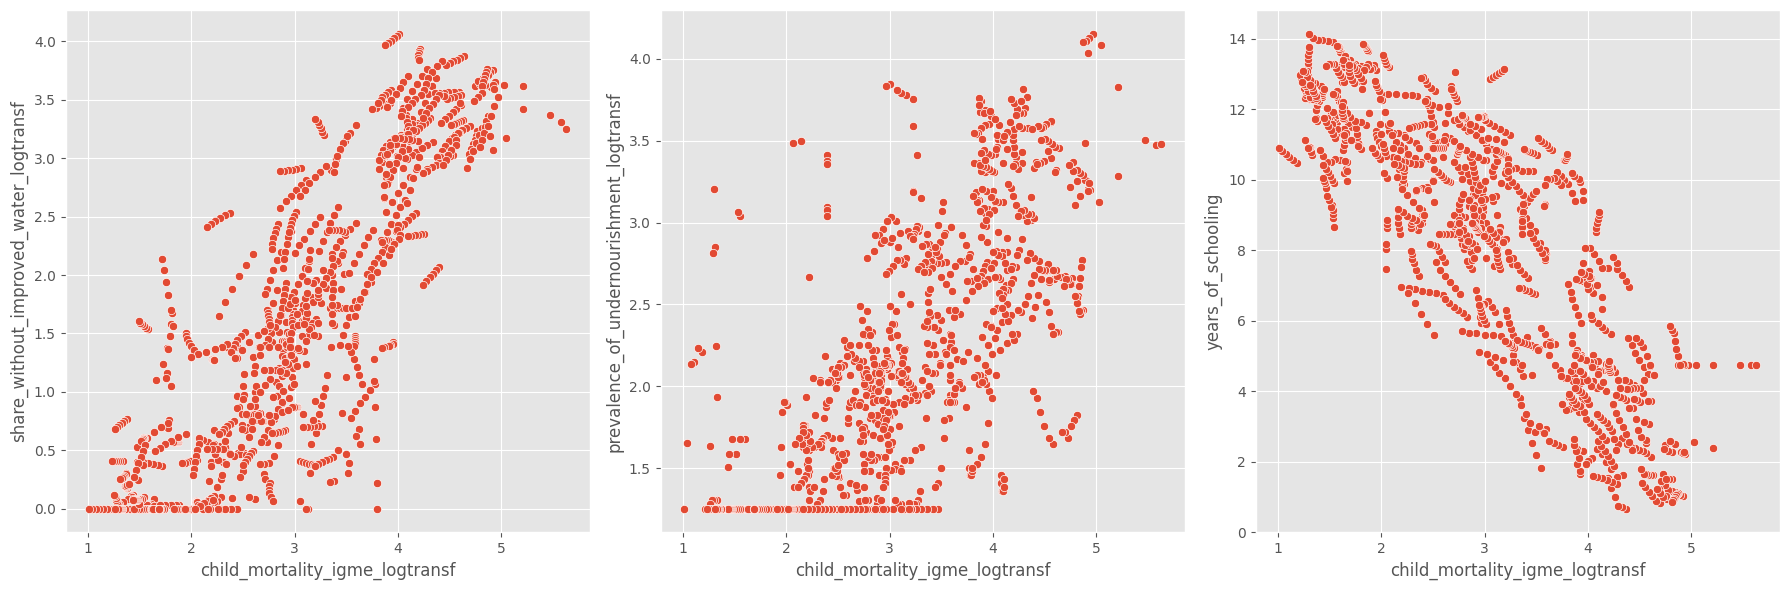

In [129]:
# ----------------------------------
# Show Features - Target Relationship 
# After Log-Transform / powertransf + RobustScale
#-----------------------------------
powertr_df = df_transformed4.add_suffix('_pwtransf')
rel_pwtr = pd.concat([rel_logtr, powertr_df], axis=1)

def scatterplots_tr(df, features, cols_num):
    fig, axs = plt.subplots(ncols=cols_num, figsize=(18, 6))
    for id, a in enumerate(axs):
        sns.scatterplot(data=df, x="child_mortality_igme_logtransf", y=features[id], ax=axs[id])
    plt.tight_layout()
    plt.show()

#rel_pwtr['vacc_squared'] = rel_pwtr['vaccination_coverage_who_unicef']**2

scatterplots_tr(rel_pwtr, ["annual_healthcare_expenditure_per_capita_logtransf", "gdp_per_capita_worldbank_logtransf", "share_of_population_urban"], 3)
scatterplots_tr(rel_pwtr, ["nurses_and_midwives_per_1000_people_logtransf", "physicians_per_1000_people_logtransf", "vaccination_coverage_who_unicef"], 3)
scatterplots_tr(rel_pwtr, ["share_without_improved_water_logtransf", "prevalence_of_undernourishment_logtransf", "years_of_schooling"], 3)

In [13]:
rel_pwtr["vaccination_coverage_who_unicef"].nunique()

71

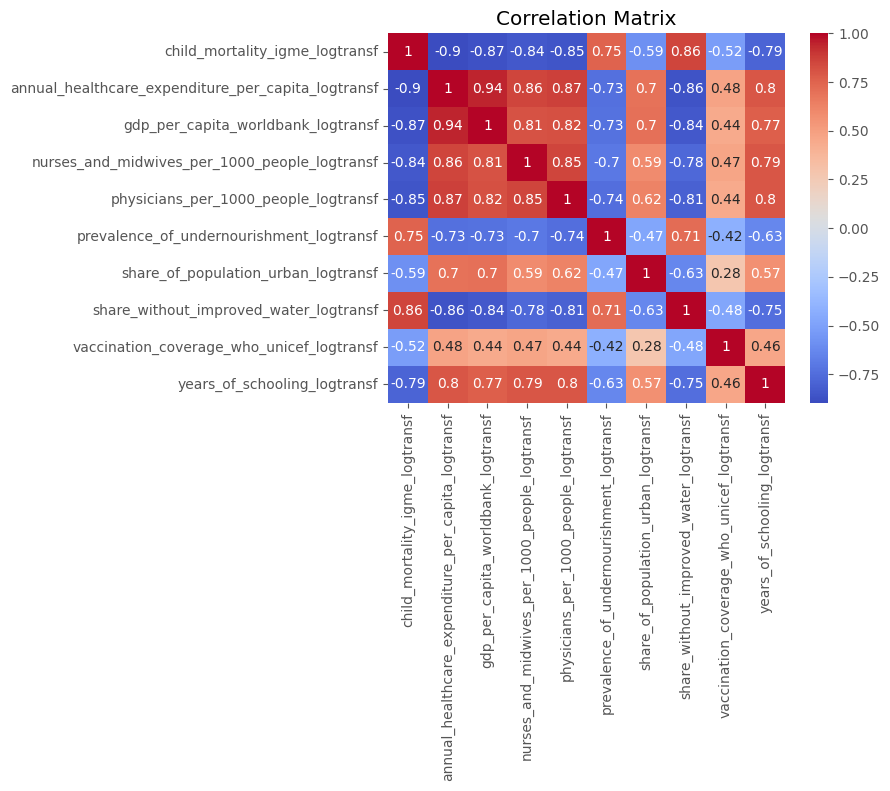

In [14]:
features_corr = rel_pwtr.copy()
only_logtr = features_corr.filter(like="logtransf")
#only_logtr = only_logtr.drop(columns=["annual_healthcare_expenditure_per_capita_logtransf"])
corr = only_logtr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [15]:
corr_raw = rel_pwtr["vaccination_coverage_who_unicef"].corr(rel_pwtr["child_mortality_igme_logtransf"])
corr_trans = rel_pwtr["vaccination_coverage_who_unicef_pwtransf"].corr(rel_pwtr["child_mortality_igme_logtransf"])

print(f"Raw: {corr_raw:.4f}, Transformed: {corr_trans:.4f}")

Raw: -0.5715, Transformed: -0.6063


In [16]:
corr_raw_s = rel_pwtr["share_without_improved_water"].corr(rel_pwtr["child_mortality_igme_logtransf"])
corr_trans_s = rel_pwtr["share_without_improved_water_logtransf"].corr(rel_pwtr["child_mortality_igme_logtransf"])

print(f"Raw: {corr_raw_s:.4f}, Transformed: {corr_trans_s:.4f}")

Raw: 0.7634, Transformed: 0.8576


### Fixed Effects

In [123]:
df_fe = df_full_imp.copy()
num_vars = df_fe.select_dtypes(include=["float64"]).columns.to_list()

df_transf = df_fe.loc[:, df_fe.select_dtypes(include=["float64"]).columns].copy()

logp1_tr = np.log1p(df_transf) #PowerTransformer() 
#df_fe_tr = power_tr.fit_transform(df_transf)

scaler_fe = RobustScaler()
scale_data_fe = scaler_fe.fit_transform(logp1_tr)

df_transf = pd.DataFrame(
    scale_data_fe,
    columns=df_transf.columns
)
df_transf[["Code", "Entity", "Year"]] = df_fe[["Code", "Entity", "Year"]]

In [124]:
df_transf = pd.merge(df_transf, world_regions[["Entity", "World regions according to WB"]], on="Entity", how="left")

In [125]:
#create mean variables by group Entity & within transformed variables (original - mean)
for col in num_vars:
    df_transf[f"{col}_mean"] = df_transf.groupby("Entity")[col].transform("mean")
    df_transf[f"{col}_within"] = df_transf[col] - df_transf[f"{col}_mean"]
    #df_transf[f"{col}_within"] = df_transf[f"{col}_w_only"] + df_transf[f"{col}_mean"]

In [126]:
#mean_vars = df_fe.loc[:, df_fe.columns.str.contains("mean")]
#within_tr_vars = df_fe.loc[:, df_fe.columns.str.contains("within")]
numerics = df_transf.select_dtypes(include=["float64"]).columns
mean_vars = numerics[numerics.str.contains("mean")]
within_tr_vars = numerics[numerics.str.contains("within")]

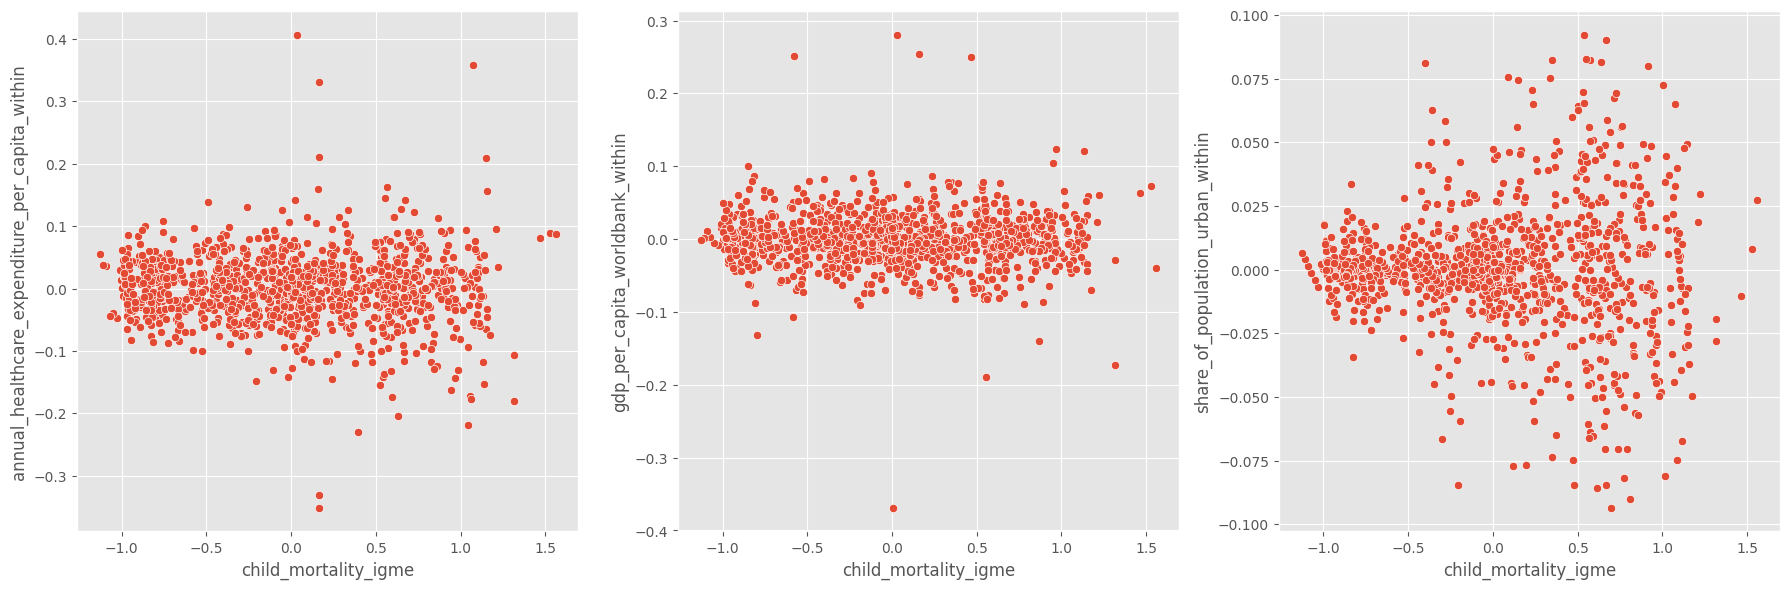

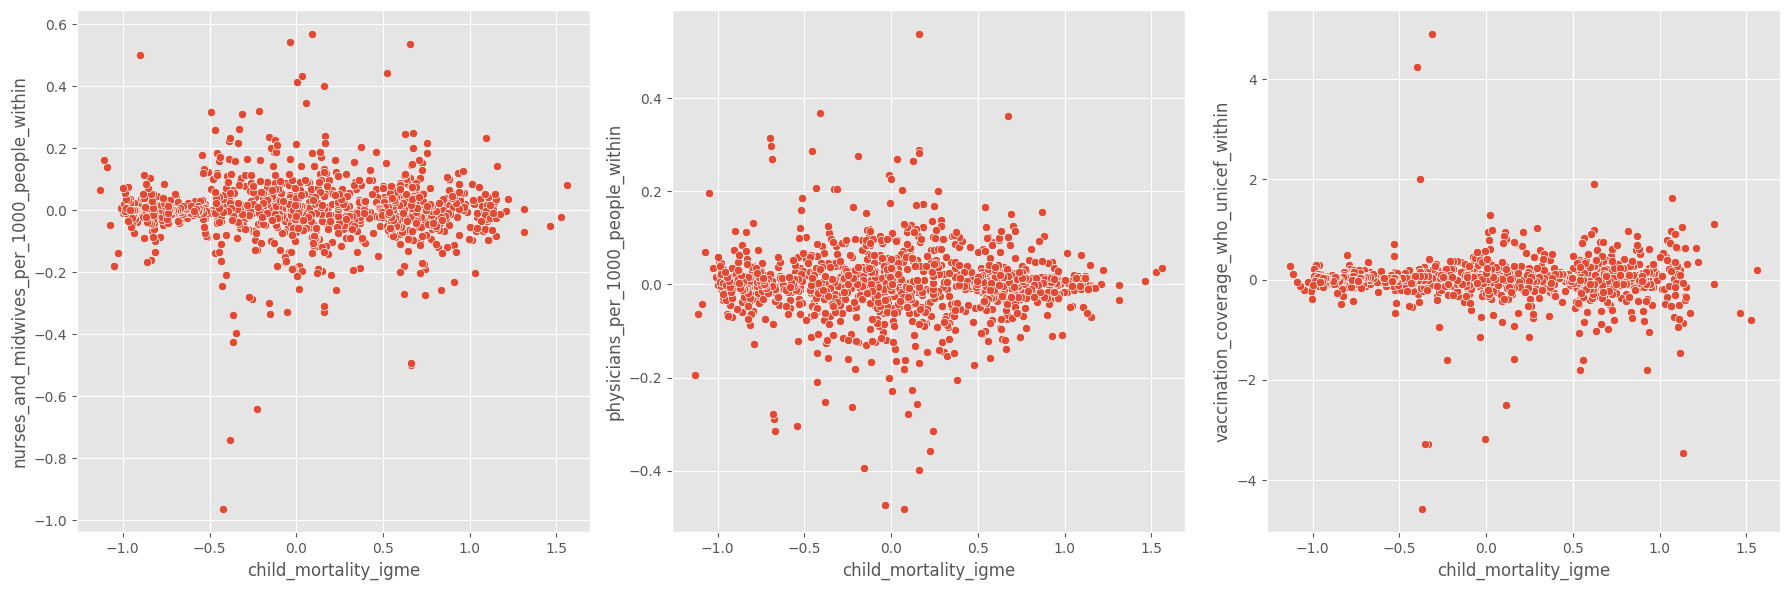

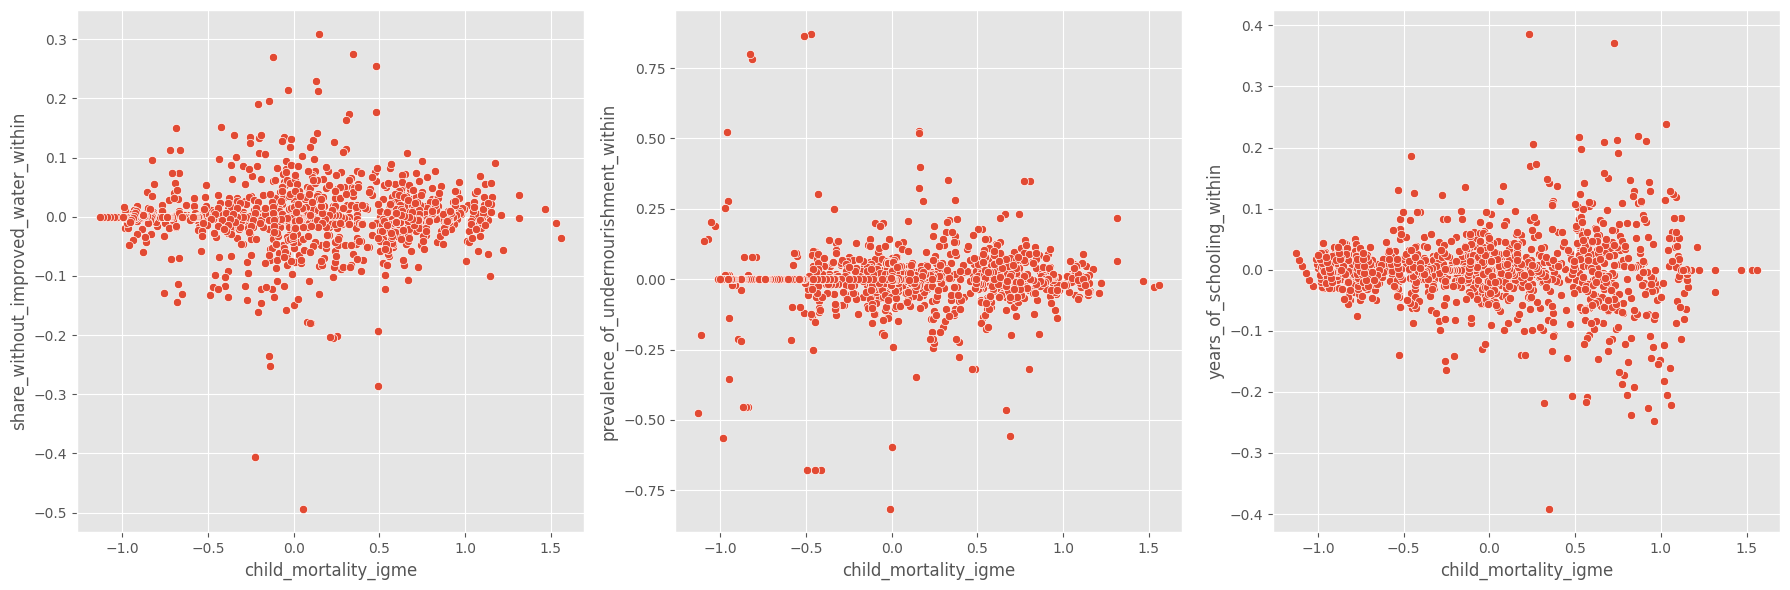

In [127]:
# ----------------------------------
# Show Features - Target Relationship 
# 
#-----------------------------------

def scatterplots_within(df, features, cols_num):
    fig, axs = plt.subplots(ncols=cols_num, figsize=(18, 6))
    for id, a in enumerate(axs):
        sns.scatterplot(data=df, x="child_mortality_igme", y=features[id], ax=axs[id])
    plt.tight_layout()
    plt.show()

#rel_pwtr['vacc_squared'] = rel_pwtr['vaccination_coverage_who_unicef']**2

scatterplots_within(df_transf, ["annual_healthcare_expenditure_per_capita_within", "gdp_per_capita_worldbank_within", "share_of_population_urban_within"], 3)
scatterplots_within(df_transf, ["nurses_and_midwives_per_1000_people_within", "physicians_per_1000_people_within", "vaccination_coverage_who_unicef_within"], 3)
scatterplots_within(df_transf, ["share_without_improved_water_within", "prevalence_of_undernourishment_within", "years_of_schooling_within"], 3)

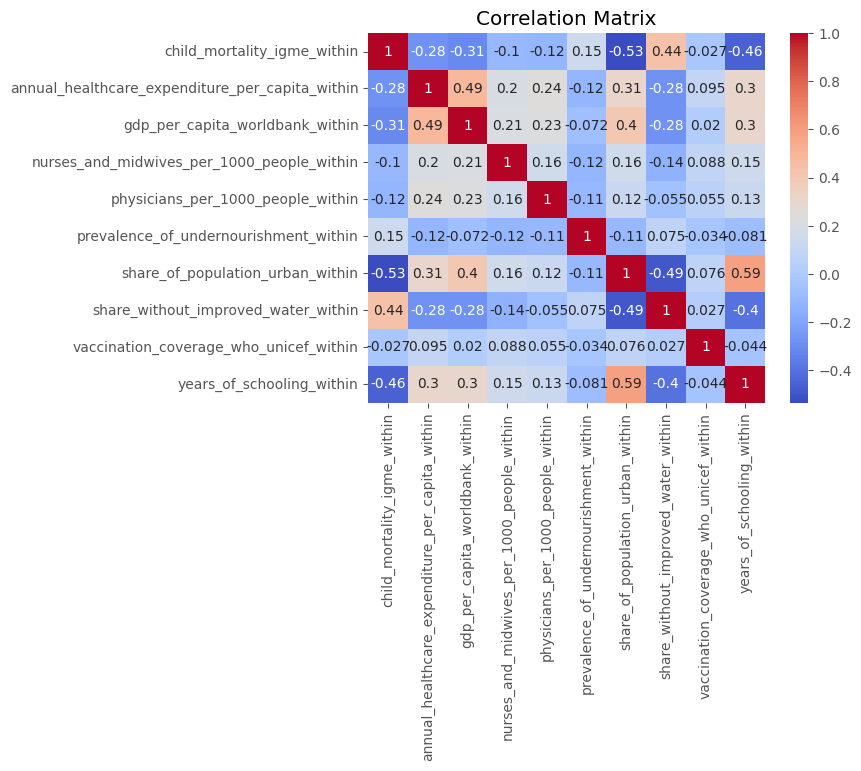

In [128]:
features_correl = df_transf.copy()
only_logtr_within = features_correl.filter(like="within")
corr_within = only_logtr_within.corr()
sns.heatmap(corr_within, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()